In [24]:
using DifferentialEquations, Plots, DataFrames, StatsPlots
# Theme for better visualization
theme(:bright)

In [32]:
function covid_model!(du, u, p, t)
    S, E, Ia, Is, H, R, D = u
    beta, omega, sigma, p_val, gamma_a, gamma_s, rho, alpha, delta = p
    
    du[1] = -beta*S*(Ia + Is) + omega*R
    du[2] = beta*S*(Ia + Is) - sigma*E
    du[3] = p_val*sigma*E - gamma_a*Ia
    du[4] = (1-p_val)*sigma*E - gamma_s*Is - rho*Is
    du[5] = rho*Is - alpha*H
    du[6] = gamma_a*Ia + gamma_s*Is + (1-delta)*alpha*H - omega*R
    du[7] = delta*alpha*H
end

covid_model! (generic function with 1 method)

In [33]:
N = 56_000_000  # Approximate population of England
initial_conditions = [N-100.0, 100.0, 0.0, 0.0, 0.0, 0.0, 0.0]
tspan = (0.0, 100.0)  # Simulate for 100 days

(0.0, 100.0)

In [34]:
# Parameters (These are hypothetical and should be adjusted based on actual data or literature)
params = [0.6, 0.05, 0.2, 0.3, 0.1, 0.1, 0.05, 0.1, 0.02]

9-element Vector{Float64}:
 0.6
 0.05
 0.2
 0.3
 0.1
 0.1
 0.05
 0.1
 0.02

In [35]:
prob = ODEProblem(covid_model!, initial_conditions, tspan, params)
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 391-element Vector{Float64}:
   0.0
   9.284720484715049e-5
   0.00021415815175245548
   0.00037090750944930784
   0.000561549308706359
   0.0007860202387704891
   0.0010414319007745838
   0.0013258622799331935
   0.001636727851983843
   0.0019716272147379896
   ⋮
  33.593441616275165
  37.3093685980426
  41.92114757800527
  47.39121005509116
  54.381042871581805
  63.1840786807343
  75.65169084218478
  96.1352720666074
 100.0
u: 391-element Vector{Vector{Float64}}:
 [5.59999e7, 100.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [5.599989708950183e7, 102.90862326534769, 0.0005624696416413472, 0.0013124261320661575, 3.0317636530080996e-9, 8.662208435371656e-9, 1.8729874669391696e-16]
 [5.5999884190320715e7, 115.80517279270818, 0.0013519341597784643, 0.0031544965711692505, 1.646831383458849e-8, 4.705265539020969e-8, 2.327337214016269e-15]
 [5.599985010517842e7, 149.8862

In [36]:
df_ode = DataFrame(t=sol.t, S=sol[1,:], E=sol[2,:], Ia=sol[3,:], Is=sol[4,:], H=sol[5,:], R=sol[6,:], D=sol[7,:])

Row,t,S,E,Ia,Is,H,R,D
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,5.59999e7,100.0,0.0,0.0,0.0,0.0,0.0
2,9.28472e-5,5.59999e7,102.909,0.00056247,0.00131243,3.03176e-9,8.66221e-9,1.87299e-16
3,0.000214158,5.59999e7,115.805,0.00135193,0.0031545,1.64683e-8,4.70527e-8,2.32734e-15
4,0.000370908,5.59999e7,149.886,0.0025844,0.00603022,5.19732e-8,1.48497e-7,1.24683e-14
5,0.000561549,5.59998e7,226.012,0.00469148,0.0109467,1.31277e-7,3.75083e-7,4.59203e-14
6,0.00078602,5.59996e7,390.066,0.00872685,0.0203624,3.02176e-7,8.6338e-7,1.39286e-13
7,0.00104143,5.59993e7,746.974,0.017134,0.0399787,6.73974e-7,1.92569e-6,3.78018e-13
8,0.00132586,5.59984e7,1555.91,0.0359392,0.0838565,1.51667e-6,4.33347e-6,9.71779e-13
9,0.00163673,5.59965e7,3479.88,0.0805141,0.187863,3.52096e-6,1.00602e-5,2.45491e-12


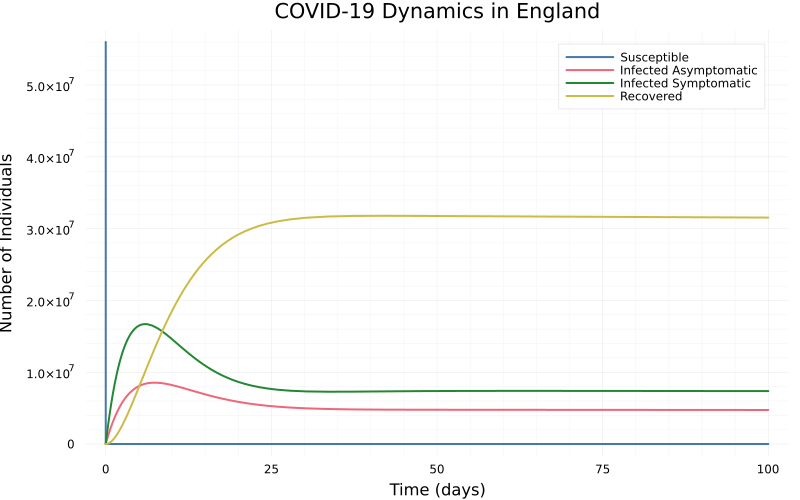

In [37]:
# Plot for Susceptible, Asymptomatic, Symptomatic, and Recovered
p1 = @df df_ode plot(:t,
    [:S :Ia :Is :R],
    label=["Susceptible" "Infected Asymptomatic" "Infected Symptomatic" "Recovered"],
    xlabel="Time (days)",
    ylabel="Number of Individuals",
    title="COVID-19 Dynamics in England",
    lw=2,
    legend=:topright,
    size=(800, 500))

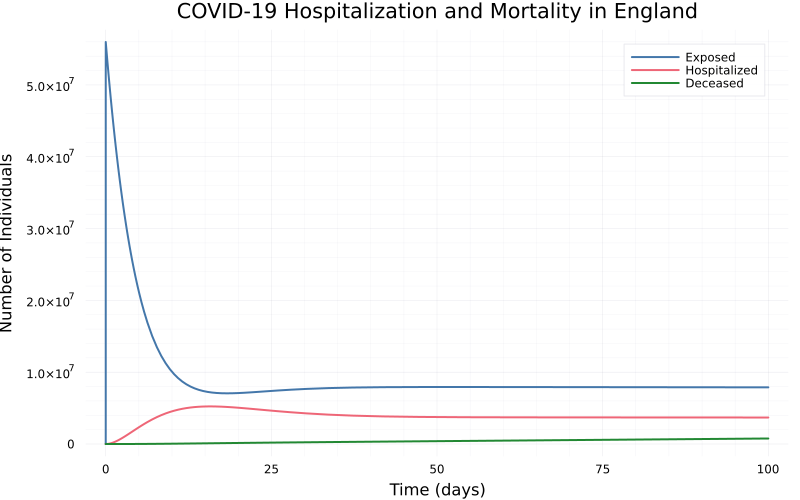

In [38]:
# Plot for Exposed, Hospitalized, and Deceased
p2 = @df df_ode plot(:t,
    [:E :H :D],
    label=["Exposed" "Hospitalized" "Deceased"],
    xlabel="Time (days)",
    ylabel="Number of Individuals",
    title="COVID-19 Hospitalization and Mortality in England",
    lw=2,
    legend=:topright,
    size=(800, 500))